In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [29]:
#Creating blank array
Array1=np.empty((3,3))
print(Array1)

[[4.9e-323 9.9e-324 1.5e-323]
 [2.0e-323 2.5e-323 3.0e-323]
 [3.5e-323 4.0e-323 4.4e-323]]


In [30]:
#predefined data
import numpy as np
Array1=np.array([[1,2,3],[4,5,6],[7,8,9]])
print(Array1)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [31]:
#pattern specific data
Array2=np.zeros((3,4))
print(Array2)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [32]:
#pattern specific data
Array2=np.ones((3,4))
print(Array2)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [33]:
#pattern specific data
Array2=np.eye((3))
print(Array2)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [34]:
#Slicing elements
Slicing=Array1[:2, 1:3]
print(Slicing)


[[2 3]
 [5 6]]


In [35]:
#Updating elements
update=Array1[0,0]=10
print(update)

10


In [36]:
#Shape manipulations
reshape=Array1.reshape(1,9)
print(reshape)

[[10  2  3  4  5  6  7  8  9]]


In [37]:
#transpose
transpose=Array1.transpose()
print(transpose)

[[10  4  7]
 [ 2  5  8]
 [ 3  6  9]]


In [38]:
# Looping over an array
for row in Array1:
    print("Row:", row)

# Using vectorized operations (more efficient)
sum_array = np.sum(Array1)
print("Sum of all elements:", sum_array)


Row: [10  2  3]
Row: [4 5 6]
Row: [7 8 9]
Sum of all elements: 54


In [39]:
import pandas as pd
df =pd.read_csv('/content/Mall_Customers.csv')
print("Data from file:\n", df)

# For more complex data, such as CSV files with missing values, use genfromtxt
complex_data = np.genfromtxt('/content/Mall_Customers.csv', delimiter=',', filling_values=-1)
print("Complex Data from file:\n", complex_data)


Data from file:
      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
Complex Data from file:
 [[ -1.  -1.  -1.  -1.  -1.]
 [  1.  -1.  19.  15.  39.]
 [

In [40]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<ipython-input-41-0fafe04ea3f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

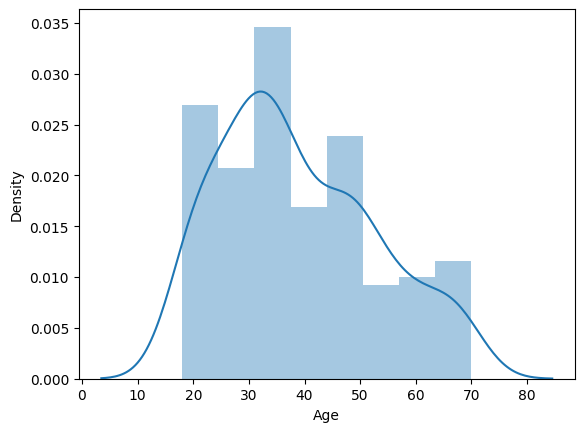

In [41]:
sns.distplot(df['Age'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
x=df.drop(columns=['CustomerID'])
y=df['CustomerID']

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape


(160, 4)

In [45]:
# Define the column transformer with OneHotEncoder for 'Gender' column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ['Gender'])
    ],
    remainder='passthrough'  # keep other columns as they are
)

# Transform the training data
x_train = column_transformer.fit_transform(x_train)
x_test = column_transformer.transform(x_test)


In [46]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)
print(lr.coef_)
print(lr.intercept_)

[-0.07716965  0.07716965 -0.04561125  2.1133212   0.031691  ]
-27.860815879639745
